**Deep Convolutional Generative Adverserial Networks**


In [ ]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import adam_v2

import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [ ]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

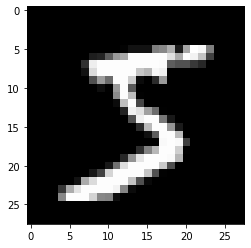

In [ ]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [ ]:
# Normalise the data from [-1,1]

In [ ]:
X_Train = (X_train.astype('float32') - 127.5)/127.5
print(np.min(X_Train))
print(np.max(X_Train))
print(X_Train.shape)

-1.0
1.0
(60000, 28, 28)


In [ ]:
TOTAL_EPOCHS = 50
BATCH_SIZE = 256 # amount of images in a single batch
NO_OF_BATCHES = int(X_Train.shape[0]/BATCH_SIZE) # 60000/256 => number of minies batch of data passing through the discriminator in one epoch
HALF_BATCH = int(BATCH_SIZE/2) # half of images will be fake and other half would be real
NOISE_DIM = 100 # upsample this noise to 784 dimensional vector which forms a 28 X 28 images
adam = adam_v2.Adam(learning_rate=2e-4,beta_1=0.5)

In [ ]:
# Reshape the training data
X_Train = X_Train.reshape((-1,28,28,1))
print(X_Train.shape)

(60000, 28, 28, 1)


In [ ]:
# Generator
# Inputs Noise (100 dim) Output vector of generated image (784 dimensional)
generator = Sequential()
generator.add(Dense(7*7*128,input_shape=(NOISE_DIM,)))
generator.add(Reshape((7,7,128))) #reshape to 7,7,128
generator.add(LeakyReLU(0.2)) #adding non linearity to 3-D channels
generator.add(BatchNormalization())

# Double the activation size 14 x 14 x 64
generator.add(UpSampling2D())
generator.add(Conv2D(64,kernel_size=(5,5),padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# Double the activation size 28 x 28 x 1
# Upsampling to 28 x 28 x 64
generator.add(UpSampling2D())
# Converting to 28 x 28 x 1
generator.add(Conv2D(1,kernel_size=(5,5),padding='same'))

generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 128)         512       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0

In [ ]:
discriminator = Sequential()
discriminator.add(Conv2D(64,(5,5),strides=(2,2),padding='same',input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Conv2D(128,(5,5),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6273      
Total params: 212,865
Trainable params: 212,865
Non-trainable params: 0
________________________________________________

In [ ]:
# output from discriminator is either 0 or 1 as we are using sigmoid for the ouput

In [ ]:
# Steps to make a GAN
# step 1 : Freeze the generator and train the discriminator
# step 2 : Freeze the discriminator and train the generator

In [ ]:
# GAN
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM))
genarated_img = generator(gan_input)
gan_output = discriminator(genarated_img)

# Keras Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)


In [ ]:
# creating folder images
if not os.path.exists('images'): 
  os.makedirs('images')
  
def save_imgs(epoch,samples=100):
  noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
  generated_imgs = generator.predict(noise)
  generated_imgs = generated_imgs.reshape(samples,28,28)

  plt.figure(figsize=(10,10))
  for i in range(samples):
    plt.subplot(10,10,i+1)
    plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
    plt.axis('off')
  
  plt.tight_layout()
  plt.savefig("images/gan_output_epoch_{0}.png".format(epoch+1))
  plt.show()

At Epoch 1 Discriminator loss is 0.16288897100664512 and Generator Loss is 0.001859593096947393
At Epoch 2 Discriminator loss is 0.37483113084777464 and Generator Loss is 1.1576489422417595
At Epoch 3 Discriminator loss is 0.4291006102839596 and Generator Loss is 1.972026087789454
At Epoch 4 Discriminator loss is 0.37637314786258924 and Generator Loss is 2.269140049433097
At Epoch 5 Discriminator loss is 0.3757316244718356 and Generator Loss is 2.4658814378273792


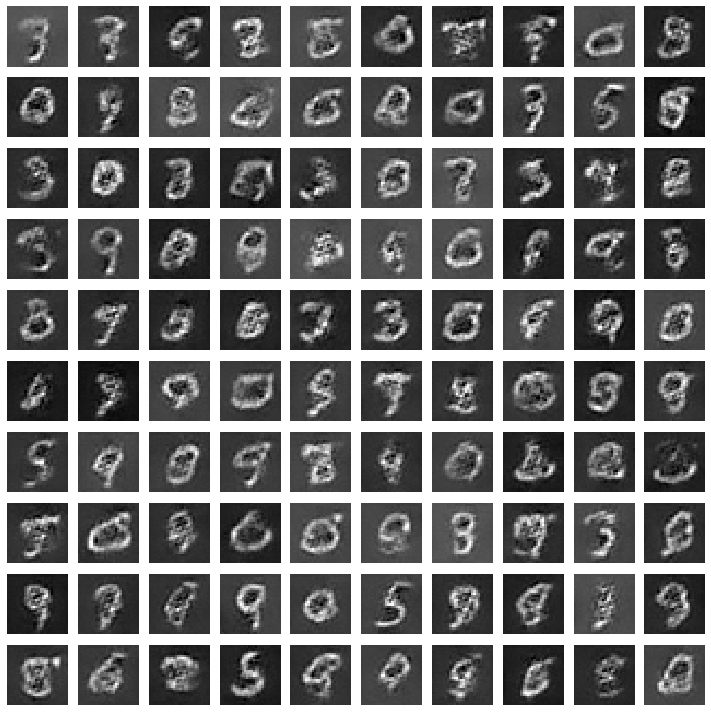

At Epoch 6 Discriminator loss is 0.3899893315238321 and Generator Loss is 2.540565999654623
At Epoch 7 Discriminator loss is 0.3929169542896442 and Generator Loss is 2.5995536217322717
At Epoch 8 Discriminator loss is 0.3736066014593483 and Generator Loss is 2.70521234243344
At Epoch 9 Discriminator loss is 0.37804816319392276 and Generator Loss is 2.77379888550848
At Epoch 10 Discriminator loss is 0.3610732576722263 and Generator Loss is 2.878143204583062


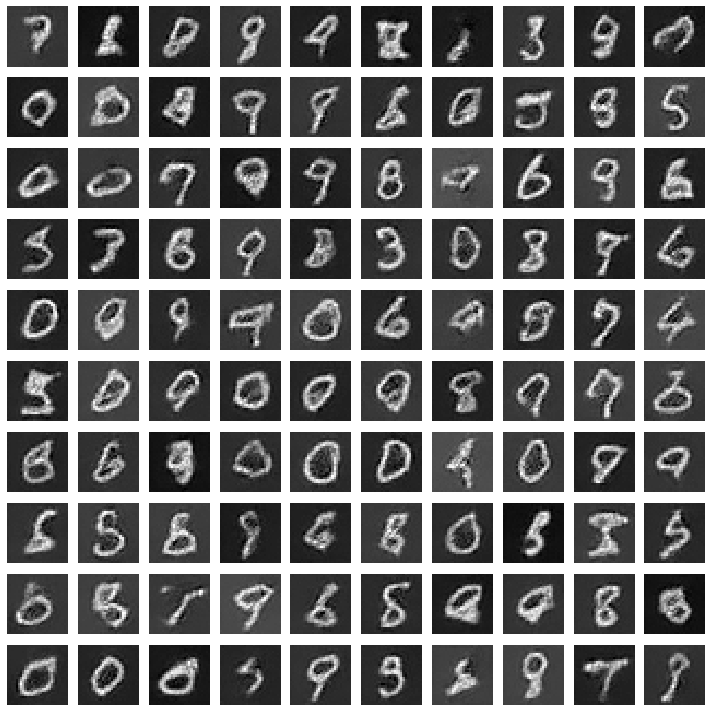

At Epoch 11 Discriminator loss is 0.3455786775224484 and Generator Loss is 3.023135042598105


KeyboardInterrupt: ignored

In [ ]:
# Training Loop
d_losses = []
g_losses = []
for epoch in range(TOTAL_EPOCHS):
  epoch_d_loss = 0
  epoch_g_loss = 0

  #Mini Batch Stochastic Gradient Descent
  for step in range(NO_OF_BATCHES):
    # Step-1 Discriminator
    # 50 % of real data and 50% of fake data

    # Real Data X
    idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH) # np.random.randint(range,count)
    real_imgs = X_Train[idx]

    # Fake Data x
    noise = np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
    fake_imgs = generator.predict(noise) #forward propagation

    # Labels
    real_y = np.ones((HALF_BATCH,1))*0.9  # One sided label smoothing for discriminator
    fake_y = np.zeros((HALF_BATCH,1))

    #Train our discriminator
    d_loss_real = discriminator.train_on_batch(real_imgs,real_y)
    d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)
    d_loss = 0.5*d_loss_real + 0.5*d_loss_fake

    epoch_d_loss += d_loss

    # Train generator (Considering Frozen Discriminator)
    noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
    ground_truth_y = np.ones((BATCH_SIZE,1))
    g_loss = model.train_on_batch(noise,ground_truth_y)
    epoch_g_loss += g_loss

  # Print the Average Losses
  print(f"At Epoch {epoch + 1} Discriminator loss is {epoch_d_loss/NO_OF_BATCHES} and Generator Loss is {epoch_g_loss/NO_OF_BATCHES}")
  d_losses.append(epoch_d_loss/NO_OF_BATCHES)
  g_losses.append(epoch_g_loss/NO_OF_BATCHES)

  if ((epoch+1)%5)==0:
    generator.save(f"model/gan_generator_{epoch + 1}.h5")
    save_imgs(epoch)



In [ ]:
# Zip folders to download it
!zip -r /content/images.zip /content/images

In [ ]:
# download
from google.colab import files
files.download('images.zip')

In [ ]:
# plot the generator and discrimintator losses
plt.plot(d_losses,label='Discriminator')
plt.plot(g_losses,label='Generator')
plt.legend()
plt.show()